In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported')


Modules are imported


### Importing covid19 dataset
> (importing "time_series_covid19_confirmed_global.csv" from "./CovidDataset")
    

In [154]:
corona_dataset = pd.read_csv("CovidDataset/time_series_covid19_confirmed_global2.csv")

In [155]:
corona_dataset.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026


### Checking the shape of dataframe

In [156]:
corona_dataset.shape

(267, 281)

### Deleting Useless column

In [157]:
corona_dataset.drop(["Lat", "Long"], axis=1, inplace=True)
corona_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,NaN,Albania,0,0,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,NaN,Angola,0,0,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026


### Aggregating the rows by country

In [158]:
corona_dataset_aggregated = corona_dataset.groupby("Country/Region").sum()

In [159]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
Albania,0,0,0,0,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
Algeria,0,0,0,0,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
Andorra,0,0,0,0,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
Angola,0,0,0,0,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026


In [160]:
corona_dataset_aggregated.shape

(189, 277)

### Visualizing data related to country

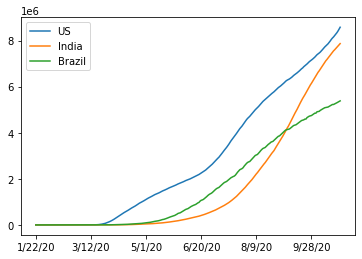

In [161]:
corona_dataset_aggregated.loc["US"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Brazil"].plot()

plt.legend()

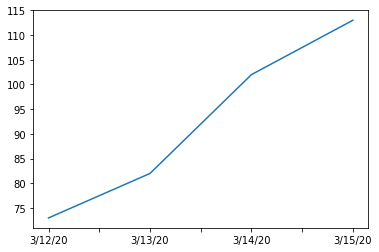

In [164]:
corona_dataset_aggregated.loc["India"][50:54].plot()

### Calculaing and plotting the first derivative of the curve

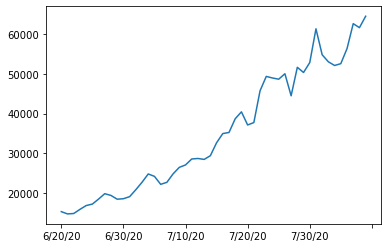

In [169]:
corona_dataset_aggregated.loc["India"].diff()[150:200].plot()

### Finding maximum infection rate for China, Italy, spain and India

In [170]:
corona_dataset_aggregated.loc["US"].diff().max()

83757.0

In [171]:
corona_dataset_aggregated.loc["India"].diff().max()

97894.0

In [172]:
corona_dataset_aggregated.loc["Brazil"].diff().max()

69074.0

### Maximum infection rate for all countries


In [173]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
    
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates    


In [174]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40073,40141,40200,40287,40357,40510,40626,40687,40768,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,16501,16774,17055,17350,17651,17948,18250,18556,18858,306.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,53998,54203,54402,54616,54829,55081,55357,55630,55880,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,3377,3377,3377,3623,3623,3811,3811,4038,4038,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,7222,7462,7622,7829,8049,8338,8582,8829,9026,289.0


### Creating a new dataframe with only needed column

In [175]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [176]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,306.0
Algeria,675.0
Andorra,299.0
Angola,289.0


### Importing the WorldHapinessReport.csv dataset

In [179]:
happiness_report_csv = pd.read_csv("CovidDataset/worldwide_happiness_report.csv")

In [181]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### dropping the useless column

In [187]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [188]:
happiness_report= happiness_report_csv.drop(useless_cols, axis=1)

In [189]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [190]:
happiness_report.set_index("Country or region", inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### joining the two dataset

 ### Corona Dataset

In [191]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,306.0
Algeria,675.0
Andorra,299.0
Angola,289.0


In [192]:
corona_data.shape

(189, 1)

### Hapiness dataset

In [193]:
hapiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [194]:
hapiness_report.shape

(156, 5)

### Joinging the both the Tables

In [199]:
data = corona_data.join(happiness_report, how="inner")

In [200]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,306.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2474.0,0.850,1.055,0.815,0.283


In [201]:
data.shape

(144, 5)

### Correlation Matrix

In [202]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.186209,0.126767,0.194467,0.093965
GDP per capita,0.186209,1.000000,0.757521,0.859431,0.394799
Social support,0.126767,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.194467,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.093965,0.394799,0.456317,0.423146,1.000000


### Visualization of the results

In [203]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,306.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2474.0,0.850,1.055,0.815,0.283


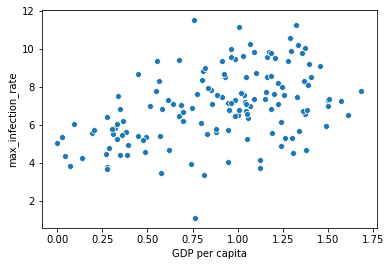

In [204]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) #This method is used to plot data and a linear regression model fit.

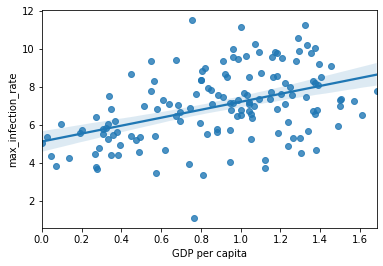

In [205]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum infection rate

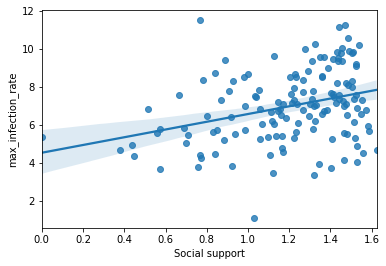

In [206]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum infection rate

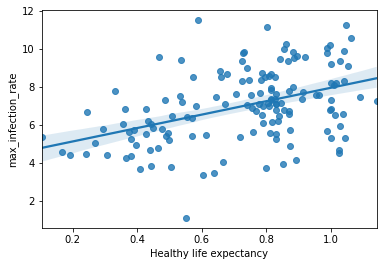

In [207]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y))

## Conclusion
### COVID cases are more in developed countries than less developed countries may be due to unavailability of test kits.

### Same do with cumulative death